In [2]:
import sys
sys.path.insert(0, "../..")

import numpy as np
from matplotlib import pyplot as plt

from module.base.network import Network
from module.simulation.meanfield2 import MeanField2
from module.simulation.meanfield import MeanField
from module.simulation.set_meanfield2 import SetMeanField2
import module.components.CONST as CONST

In [3]:
N = 4
net = Network(N, N, 1, [[N-1,0,0],[0,N-1,0],[N-1,N-1,0]])
mf2 = MeanField2(net)
configs = np.arange(200)
size_str = str(N) + "x" + str(N) + ".csv"

## Load MF2 data
mf2_means = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_means" + size_str)
mf2_vars = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_vars" + size_str)
mf2_covs = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_covs" + size_str).reshape((200,16,6))
mf2_conv_means = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_conv_means" + size_str)
mf2_conv_vars = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_conv_vars" + size_str)
mf2_conv_covs = np.loadtxt("../../data/second_order/4x4/mf2_without_cov/mf2_conv_covs" + size_str)

## Load MF1 data
mf1_means = np.loadtxt("../../data/second_order/4x4/mf1/mf1_means" + size_str)

## Load KMC data
...

Ellipsis

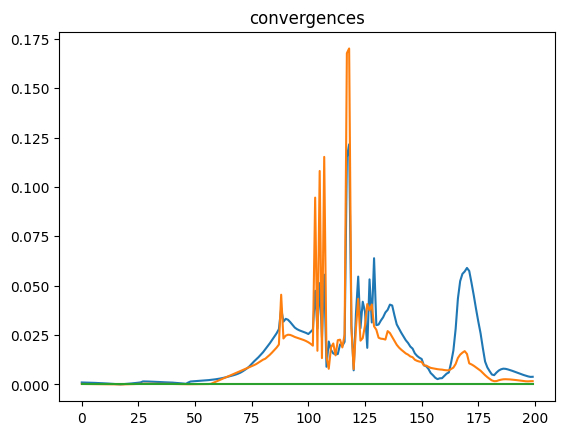

In [4]:
plt.title("convergences")
plt.plot(configs, mf2_conv_means, label = "means")
plt.plot(configs, mf2_conv_vars, label = "variances")
plt.plot(configs, mf2_conv_covs, label = "covariances")

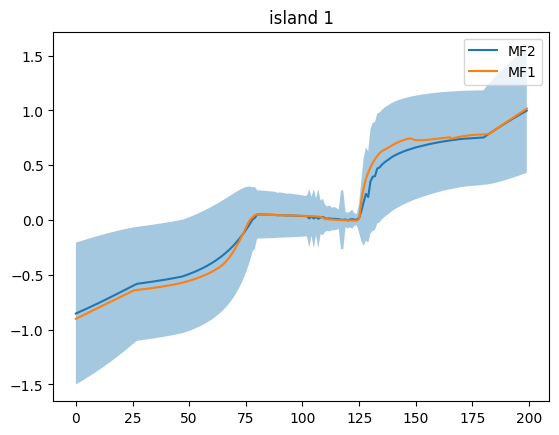

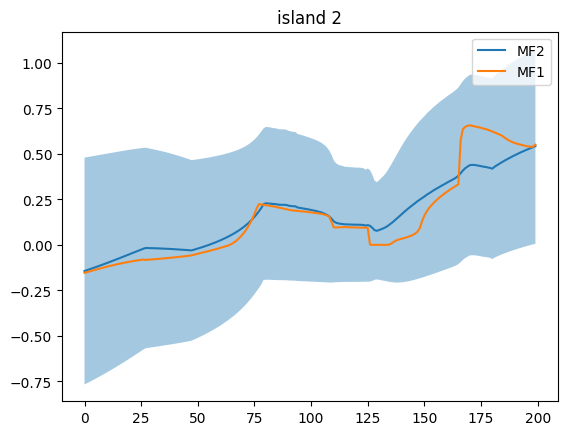

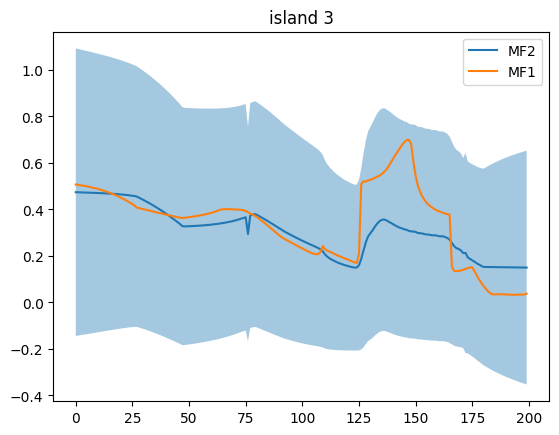

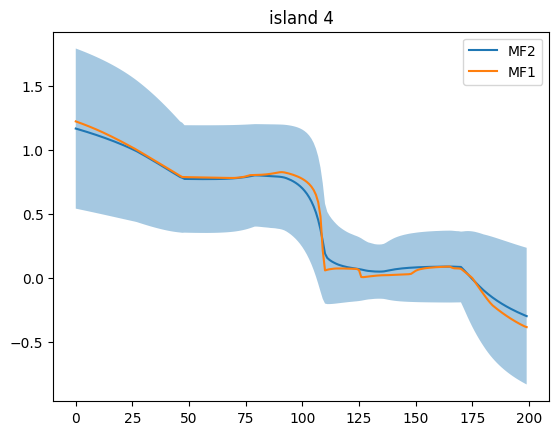

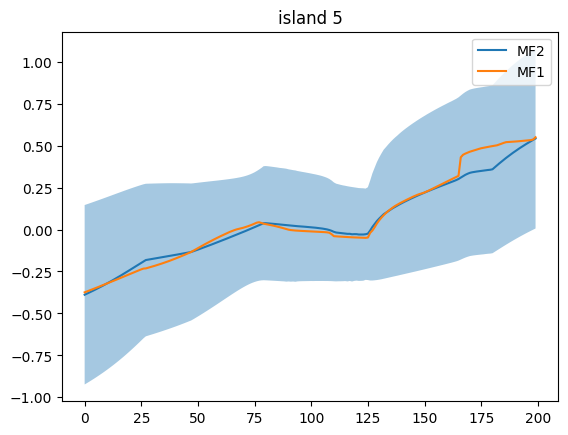

In [5]:
for i in range(0,5):
    plt.figure()
    plt.plot(configs, mf2_means[:,i], label = "MF2")
    plt.plot(configs, mf1_means[:,i], label = "MF1")
    plt.fill_between(configs, mf2_means[:,i] - np.sqrt(mf2_vars[:,i]),  mf2_means[:,i] + np.sqrt(mf2_vars[:,i]), alpha = 0.4)
    plt.legend()
    plt.title("island "+str(i+1))

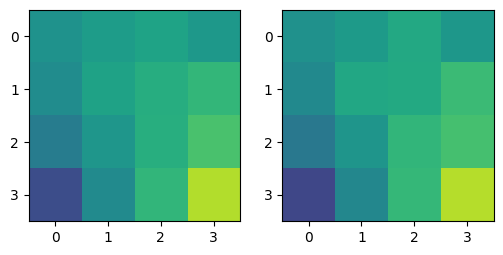

In [11]:
i = 125
f, axs = plt.subplots(1,2,figsize=(6,3))
axs[0].imshow(mf2_means[i,:].reshape(4,4),vmin = -1, vmax = 1)
axs[1].imshow(mf1_means[i,:].reshape(4,4),vmin = -1, vmax = 1)